## Set up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns
import re
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.10f}'.format)
pd.set_option('display.float_format', lambda x: ('%f' % x).rstrip('0').rstrip('.'))

In [2]:
df = pd.read_csv('return_orders_df.csv')
df['date_sold'] = pd.to_datetime(df['date_sold'])
df['year'] = df['date_sold'].dt.year
df['month'] = df['date_sold'].dt.month

In [3]:
df.head()

,Order ID,Sale ID,Order,Transaction type,Sales channel,Shipping country,Shipping region,Shipping city,Product type,Product vendor,Net quantity,Gross sales,Discounts,Returns,Net sales,Shipping,Taxes,Total sales,size,color,style,date_sold,month,year
0,5552290000000,17444600000000,#2098,Unknown,Online Store,United States,Arkansas,Bryant,No info,No info,0,0,0,-9,-9,0,0,-9,No info,No info,No info,2024-01-12,1,2024
1,5552290000000,17441200000000,#2098,Product,Online Store,United States,Arkansas,Bryant,Sale,Inspired Fashion 40,-1,0,0,-9,-9,0,0,-9,No info,No info,No info,2024-01-12,1,2024
2,5552290000000,17441200000000,#2098,Unknown,Online Store,United States,Arkansas,Bryant,No info,No info,0,0,0,9,9,0,0,9,No info,No info,No info,2024-01-12,1,2024
3,5619390000000,17699900000000,#2179,Product,Point of Sale,No info,No info,No info,Shirts & tops,Inspired Fashion 40,-1,0,0,0,0,0,0,0,No info,No info,Tulle Halter,2024-03-21,3,2024
4,5619390000000,17699900000000,#2179,Product,Point of Sale,No info,No info,No info,Dresses,Inspired Fashion 40,-1,0,0,-63.91,-63.91,0,-3.83,-67.74,No info,No info,Mustard Silk,2024-03-21,3,2024


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          14 non-null     float64       
 1   Sale ID           14 non-null     float64       
 2   Order             14 non-null     object        
 3   Transaction type  14 non-null     object        
 4   Sales channel     14 non-null     object        
 5   Shipping country  14 non-null     object        
 6   Shipping region   14 non-null     object        
 7   Shipping city     14 non-null     object        
 8   Product type      14 non-null     object        
 9   Product vendor    14 non-null     object        
 10  Net quantity      14 non-null     int64         
 11  Gross sales       14 non-null     float64       
 12  Discounts         14 non-null     float64       
 13  Returns           14 non-null     float64       
 14  Net sales         14 non-nul

## Sales vs. Channels

In [5]:
sample = df.groupby(['Sales channel']).agg({'Net sales': 'sum'}).reset_index()

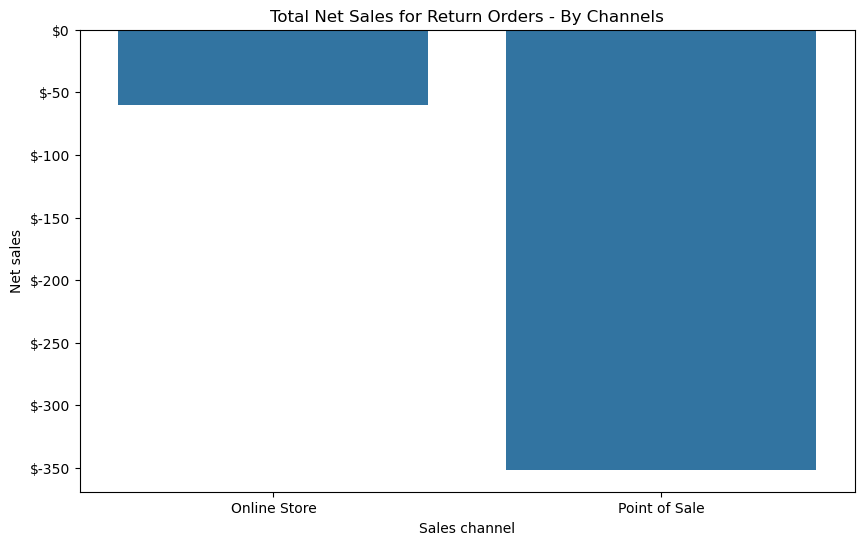

In [6]:
plt.figure(figsize=(10, 6)) 
sns.barplot(x='Sales channel', y='Net sales', data=sample)

plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${x:,.0f}'))
plt.title('Total Net Sales for Return Orders - By Channels')

plt.savefig('Net_Sales_Return_Channels.png')

In [7]:
df.columns

Index(['Order ID', 'Sale ID', 'Order', 'Transaction type', 'Sales channel',
       'Shipping country', 'Shipping region', 'Shipping city', 'Product type',
       'Product vendor', 'Net quantity', 'Gross sales', 'Discounts', 'Returns',
       'Net sales', 'Shipping', 'Taxes', 'Total sales', 'size', 'color',
       'style', 'date_sold', 'month', 'year'],
      dtype='object')

In [8]:
for col in ['Product type','size', 'color', 'style','Transaction type']:
    print(f'{col} has {df[col].unique()}','\n')

Product type has ['No info' 'Sale' 'Shirts & tops' 'Dresses' 'Shirts' 'Coats & jackets'
 'Event' 'Skirt suits'] 

size has ['No info'] 

color has ['No info' 'Black'] 

style has ['No info' 'Tulle Halter' 'Mustard Silk' 'Red Bow Tie' 'Ruffle' 'Baroque'] 

Transaction type has ['Unknown' 'Product'] 



## Sales vs. Product type

In [9]:
df.head()

,Order ID,Sale ID,Order,Transaction type,Sales channel,Shipping country,Shipping region,Shipping city,Product type,Product vendor,Net quantity,Gross sales,Discounts,Returns,Net sales,Shipping,Taxes,Total sales,size,color,style,date_sold,month,year
0,5552290000000,17444600000000,#2098,Unknown,Online Store,United States,Arkansas,Bryant,No info,No info,0,0,0,-9,-9,0,0,-9,No info,No info,No info,2024-01-12,1,2024
1,5552290000000,17441200000000,#2098,Product,Online Store,United States,Arkansas,Bryant,Sale,Inspired Fashion 40,-1,0,0,-9,-9,0,0,-9,No info,No info,No info,2024-01-12,1,2024
2,5552290000000,17441200000000,#2098,Unknown,Online Store,United States,Arkansas,Bryant,No info,No info,0,0,0,9,9,0,0,9,No info,No info,No info,2024-01-12,1,2024
3,5619390000000,17699900000000,#2179,Product,Point of Sale,No info,No info,No info,Shirts & tops,Inspired Fashion 40,-1,0,0,0,0,0,0,0,No info,No info,Tulle Halter,2024-03-21,3,2024
4,5619390000000,17699900000000,#2179,Product,Point of Sale,No info,No info,No info,Dresses,Inspired Fashion 40,-1,0,0,-63.91,-63.91,0,-3.83,-67.74,No info,No info,Mustard Silk,2024-03-21,3,2024


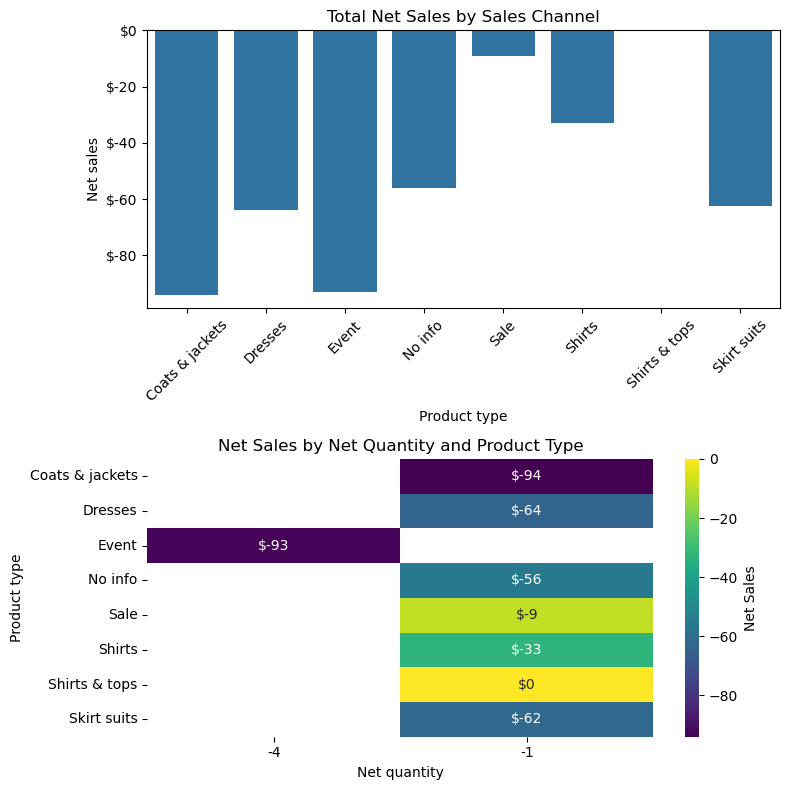

In [10]:
sample = df.groupby('Product type').agg(
    {'Net sales': 'sum', 'Net quantity': 'sum'}).reset_index()

heatmap_data = sample.pivot_table(
    index='Product type', values='Net sales', columns='Net quantity'
)


fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (8, 8))
plt.subplots_adjust(hspace = 1)

sns.barplot(data = sample, x='Product type', y='Net sales', ax = ax1)
ax1.set_title('Total Net Sales by Sales Channel')
ax1.tick_params(axis='x', rotation=45)
ax1.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${x:,.0f}'))

sns.heatmap(data = heatmap_data, annot =True, fmt='.0f', cmap='viridis', ax=ax2, cbar_kws={'label': 'Net Sales'})
for text in ax2.texts:
    text.set_text(f'${int(text.get_text()):,}')
ax2.set_title('Net Sales by Net Quantity and Product Type')

plt.tight_layout()
plt.savefig('Heatmap_Net_Sales_Return.png')
plt.show()

In [11]:
heatmap_data

Net quantity,-4,-1
Product type,,
Coats & jackets,NaN,-94
Dresses,NaN,-63.91
Event,-93,NaN
No info,NaN,-55.86
Sale,NaN,-9
Shirts,NaN,-32.99
Shirts & tops,NaN,0
Skirt suits,NaN,-62.5


In [12]:
sample2 = df.groupby('Product type').agg({'Net quantity': 'sum'}).reset_index()

## Product return rate (returned Product type only)

In [13]:
full_orders = pd.read_csv('all_orders_df.csv')

In [14]:
s1 = full_orders.groupby('Product type').agg({'Net quantity': 'sum'}).reset_index().rename(columns = {'Net quantity': 'Total Net Quantity'})

s2 = df.groupby('Product type').agg({'Net quantity': 'sum'}).reset_index().rename(columns = {'Net quantity': 'Returned Net Quantity'})
s2['Returned Net Quantity'] = s2['Returned Net Quantity'].abs()

In [15]:
s1_filtered = s1[s1['Product type'].isin(s2['Product type'])]
s1_filtered

,Product type,Total Net Quantity
6,Coats & jackets,12
7,Dresses,57
8,Event,10
15,No info,22
17,Sale,28
18,Shirts,2
19,Shirts & tops,34
21,Skirt suits,4


In [16]:
s1_filtered_s2 = pd.merge(s1_filtered, s2, on='Product type', how='outer')

s1_filtered_s2['rate'] = ((s1_filtered_s2['Returned Net Quantity'] / s1_filtered_s2['Total Net Quantity']) * 100).round(2)

s1_filtered_s2.sort_values('rate', ascending=False, inplace=True)

In [ ]:
s1_filtered_s2.reset_index(inplace=True)
s1_filtered_s2.drop(columns=['index','level_0'], inplace=True)

In [35]:
s1_filtered_s2

,Product type,Total Net Quantity,Returned Net Quantity,rate
0,Shirts,2,1,50
1,Event,10,4,40
2,Skirt suits,4,1,25
3,Coats & jackets,12,1,8.33
4,No info,22,1,4.55
5,Sale,28,1,3.57
6,Shirts & tops,34,1,2.94
7,Dresses,57,1,1.75


/var/folders/lt/42qswnrj5_3cd5pgfvbrqrk00000gn/T/ipykernel_11796/4038623784.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


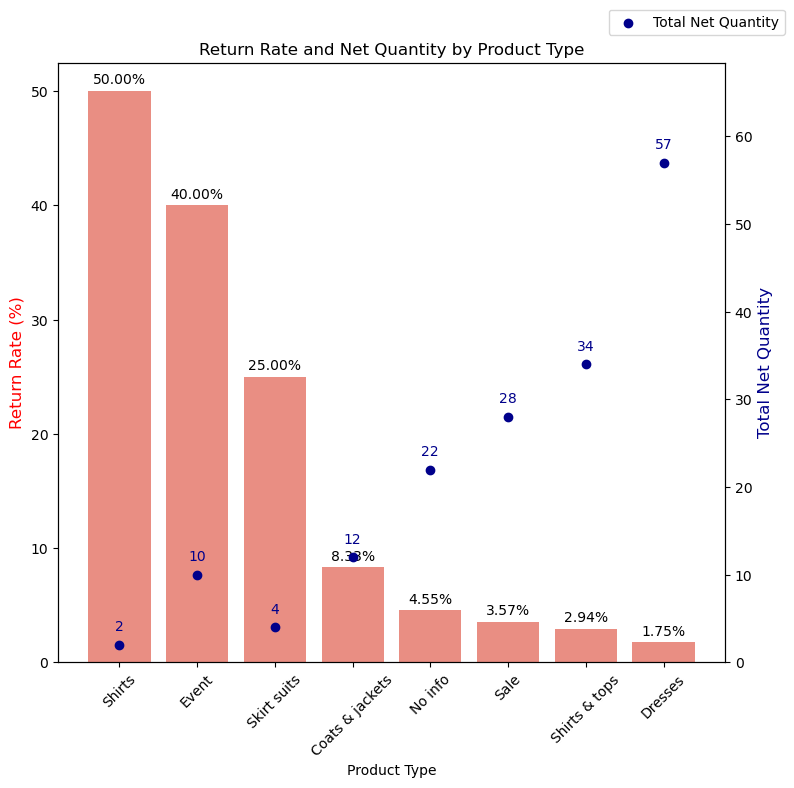

In [36]:
# Create Figure and Axes
fig, ax1 = plt.subplots(figsize=(8, 8))

# Barplot
bars = sns.barplot(data=s1_filtered_s2,
                   x='Product type',
                   y='rate',
                   color='salmon',
                   ax=ax1)

# Bar labels
for i in ax1.containers:
    ax1.bar_label(i, fmt='%.2f%%', padding=3)

# Scatter Plot on Secondary Axis
ax2 = ax1.twinx()

line = ax2.scatter(s1_filtered_s2['Product type'], 
                   s1_filtered_s2['Total Net Quantity'], 
                   color='darkblue', 
                   marker='o',
                   label='Net Quantity')

# Add labels for scatter points
for i, txt in enumerate(s1_filtered_s2['Total Net Quantity']):
    ax2.annotate(txt, 
                 (s1_filtered_s2['Product type'][i], 
                  s1_filtered_s2['Total Net Quantity'][i]),
                 textcoords="offset points", 
                 xytext=(0, 10), 
                 ha='center',
                 fontsize=10,
                 color='darkblue')

# Ensure the right axis matches the scale of Net Quantity
ax2.set_ylim(0, max(s1_filtered_s2['Total Net Quantity']) * 1.2)  # Add some padding for clarity

# Axis Labels
ax1.set_xlabel('Product Type')
ax1.set_ylabel('Return Rate (%)', color='red', size=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

ax2.set_ylabel('Total Net Quantity', color='darkblue', size=12)

# Legend and Title
ax2.legend(['Total Net Quantity'], loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.title('Return Rate and Net Quantity by Product Type')

# Layout and Save
plt.tight_layout()
plt.savefig('Return Rate and Net Quantity by Product Type.png')
plt.show()

In [19]:
s1_filtered_s2

,Product type,Total Net Quantity,Returned Net Quantity,rate
5,Shirts,2,1,50
2,Event,10,4,40
7,Skirt suits,4,1,25
0,Coats & jackets,12,1,8.33
3,No info,22,1,4.55
4,Sale,28,1,3.57
6,Shirts & tops,34,1,2.94
1,Dresses,57,1,1.75


## Product return rate (every Product type)

In [20]:
s1 = full_orders.groupby('Product type').agg({'Net quantity': 'sum'}).reset_index().rename(columns = {'Net quantity': 'Total Net Quantity'})

s2 = df.groupby('Product type').agg({'Net quantity': 'sum'}).reset_index().rename(columns = {'Net quantity': 'Returned Net Quantity'})
s2['Returned Net Quantity'] = s2['Returned Net Quantity'].abs()

df_merge = pd.merge(s1, s2, on='Product type', how='outer')

df_merge.fillna(0, inplace=True)
df_merge.sort_values('Returned Net Quantity', ascending=False, inplace=True)

df_merge['rate'] = ((df_merge['Returned Net Quantity'] / df_merge['Total Net Quantity']) * 100).round(2)


In [21]:
df_merge

,Product type,Total Net Quantity,Returned Net Quantity,rate
8,Event,10,4,40
21,Skirt suits,4,1,25
19,Shirts & tops,34,1,2.94
6,Coats & jackets,12,1,8.33
7,Dresses,57,1,1.75
...,...,...,...,...
5,Butterfly,1,0,0
4,Bodysuits,14,0,0
3,Blazers,3,0,0
2,Apparel & accessories,7,0,0


/var/folders/lt/42qswnrj5_3cd5pgfvbrqrk00000gn/T/ipykernel_11796/2552724572.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


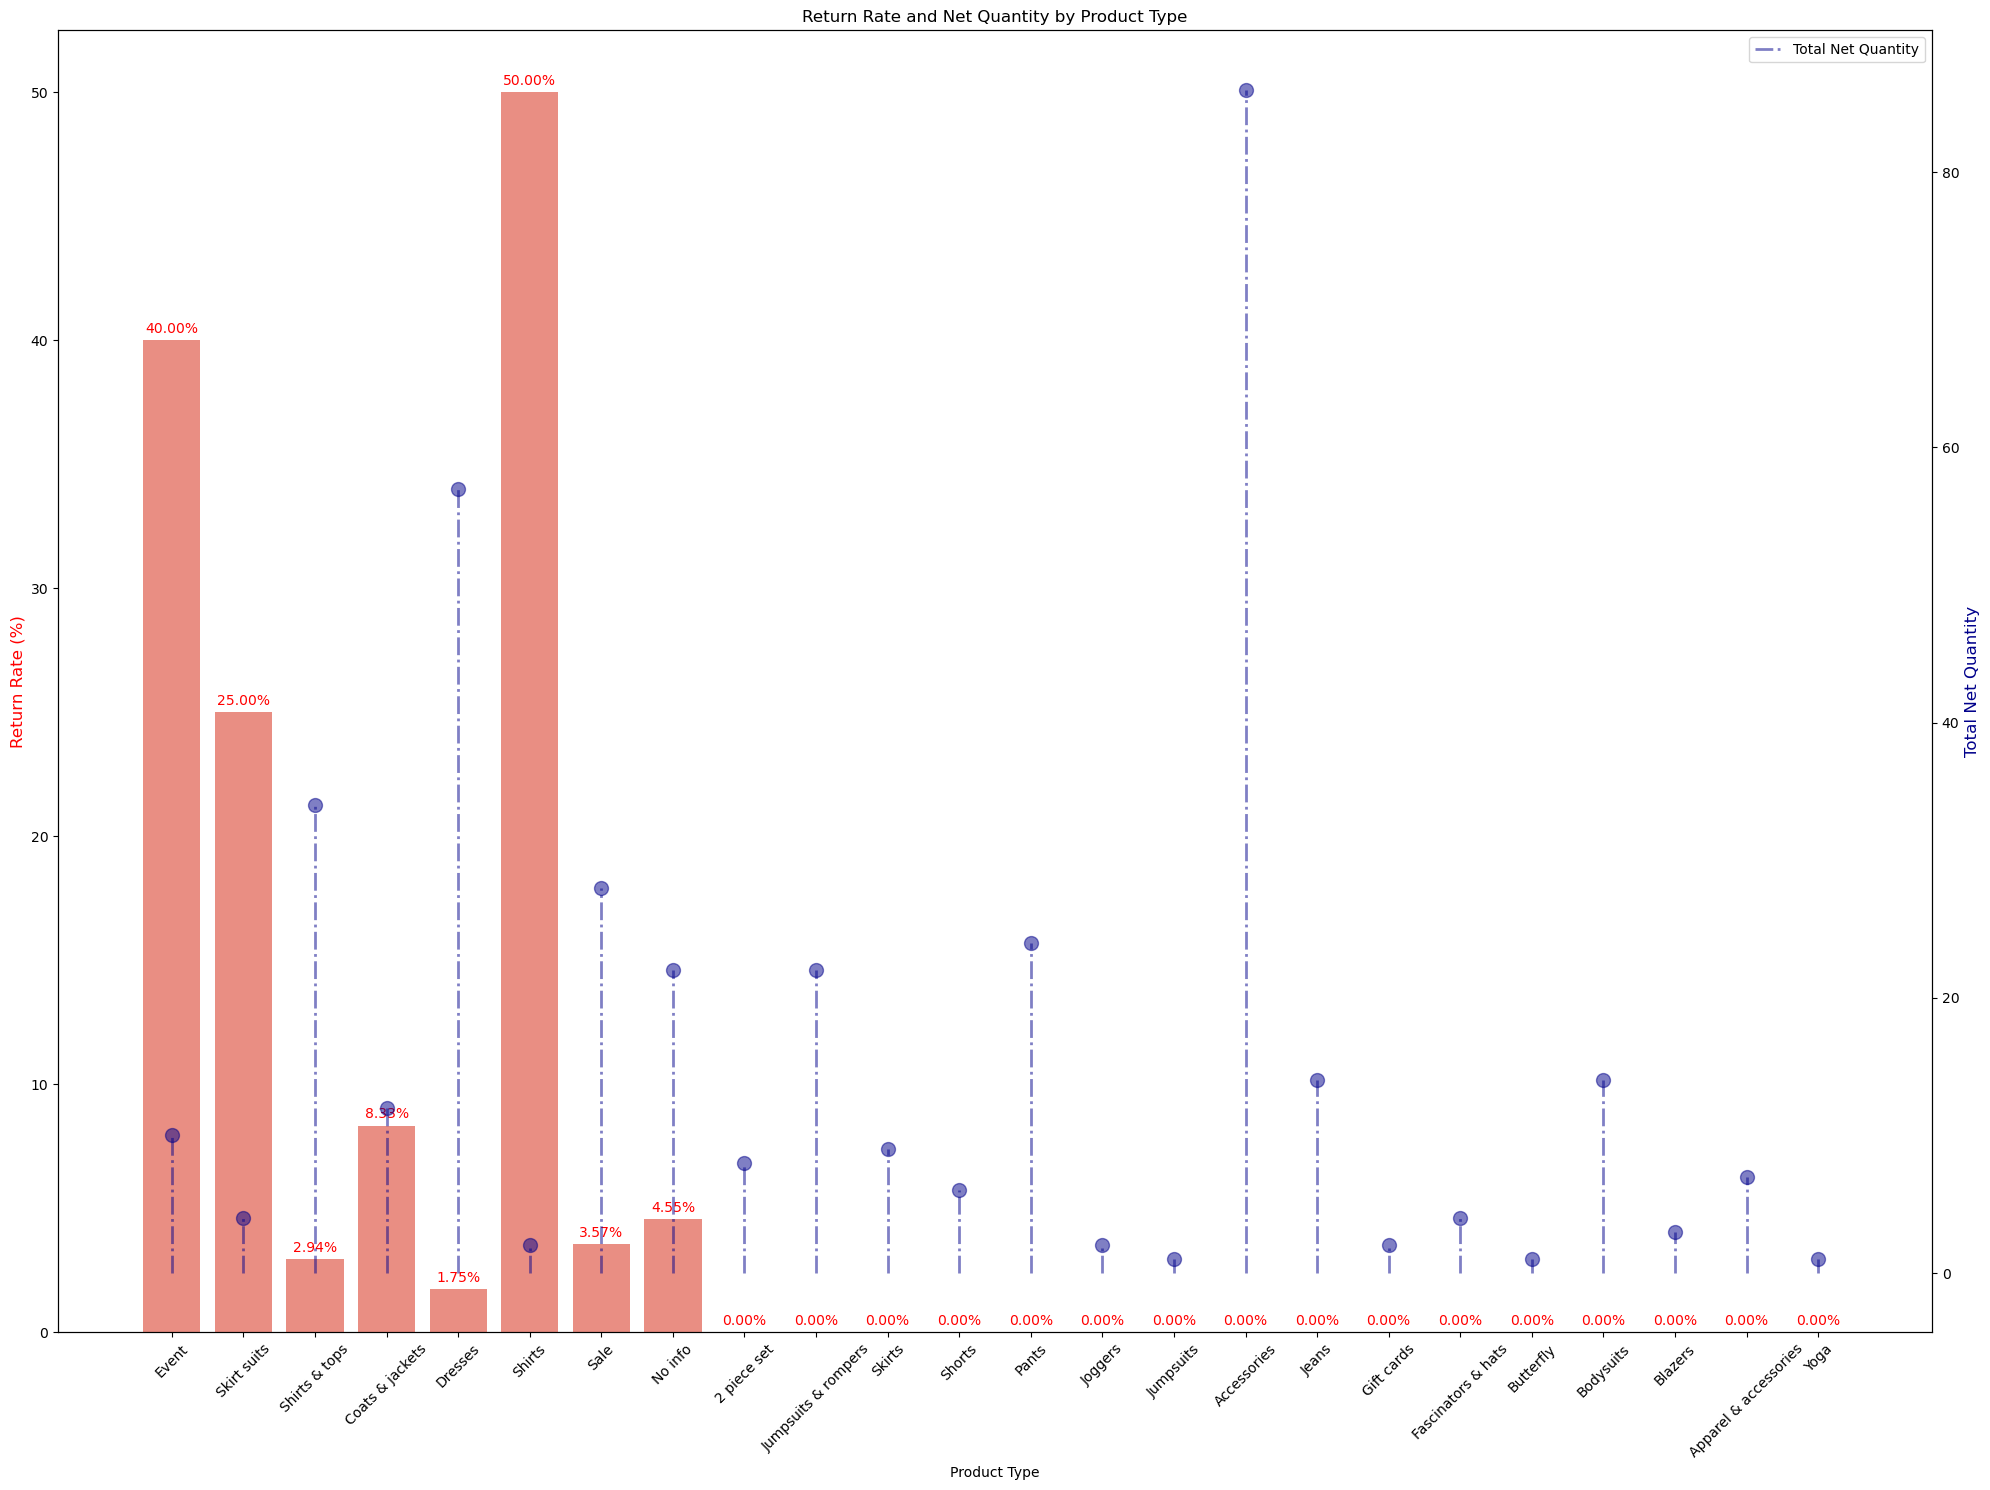

In [22]:
fig, ax1 = plt.subplots(figsize=(20,15))

bars = sns.barplot(data=df_merge,
                  x='Product type',
                  y='rate',
                  color='salmon',
                  ax=ax1)

for i in ax1.containers:
    ax1.bar_label(i, fmt='%.2f%%', padding=3, color='red')

# ------------------------------------------------

ax2 = ax1.twinx()

# Lollipop lines
ax2.vlines(x=df_merge['Product type'], ymin=0, ymax=df_merge['Total Net Quantity'], color='darkblue', linewidth=2, alpha=0.5, linestyles='dashdot')

# Scatter points (lollipop heads)
ax2.scatter(df_merge['Product type'], df_merge['Total Net Quantity'], color='darkblue', marker='o', s=100, label='Total Net Quantity', alpha=0.5)                                           


ax1.set_xlabel('Product Type')
ax1.set_ylabel('Return Rate (%)', color='red', size=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

ax2.set_ylabel('Total Net Quantity', color='darkblue', size=12)
ax2.legend(['Total Net Quantity'], loc='upper right')

plt.title('Return Rate and Net Quantity by Product Type')

plt.tight_layout()
plt.savefig('Return Rate and Net Quantity by EVERY Product Type.png')
plt.show()